In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import bs4
import seaborn as sbn
url='https://www.mohfw.gov.in'


In [2]:
resp=req.get(url)
soup=bs4.BeautifulSoup(resp.content,'html.parser')
all_rows=soup.find_all('tr')

In [3]:
#for adding all rows in a list
states = [] 
for row in all_rows:
    state = []
    for i in row.find_all('td'):
        state.append(i.text)
    states.append(state)
states

[[],
 ['1', 'Andhra Pradesh', '473', '14', '9'],
 ['2', 'Andaman and Nicobar Islands', '11', '10', '0'],
 ['3', 'Arunachal Pradesh', '1', '0', '0'],
 ['4', 'Assam', '31', '0', '1'],
 ['5', 'Bihar', '66', '26', '1'],
 ['6', 'Chandigarh', '21', '7', '0'],
 ['7', 'Chhattisgarh', '31', '10', '0'],
 ['8', 'Delhi', '1510', '30', '28'],
 ['9', 'Goa', '7', '5', '0'],
 ['10', 'Gujarat', '617', '55', '26'],
 ['11', 'Haryana', '199', '34', '3'],
 ['12', 'Himachal Pradesh', '32', '13', '1'],
 ['13', 'Jammu and Kashmir', '270', '16', '4'],
 ['14', 'Jharkhand', '24', '0', '2'],
 ['15', 'Karnataka', '258', '65', '9'],
 ['16', 'Kerala', '379', '198', '3'],
 ['17', 'Ladakh', '15', '10', '0'],
 ['18', 'Madhya Pradesh', '730', '51', '50'],
 ['19', 'Maharashtra', '2337', '229', '160'],
 ['20', 'Manipur', '2', '1', '0'],
 ['21', 'Meghalaya', '1', '0', '0'],
 ['22', 'Mizoram', '1', '0', '0'],
 ['23', 'Nagaland', '1', '0', '0'],
 ['24', 'Odisha', '55', '18', '1'],
 ['25', 'Puducherry', '7', '1', '0'],
 ['26'

In [4]:
del states[0] #removal of nonetype itmes from list

del states[-2:] #removal of noneusable itemd from list


In [6]:
new_cols = ["Sr.No", "States","Confirmed","Recovered","Death"]
state_data = pd.DataFrame(data = states, columns = new_cols)
state_data['Confirmed']=state_data['Confirmed'].map(int)
state_data['Recovered']=state_data['Recovered'].map(int)
state_data['Death']=state_data['Death'].map(int)
state_data.head()


,Sr.No,States,Confirmed,Recovered,Death
0,1,Andhra Pradesh,473,14,9
1,2,Andaman and Nicobar Islands,11,10,0
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,31,0,1
4,5,Bihar,66,26,1


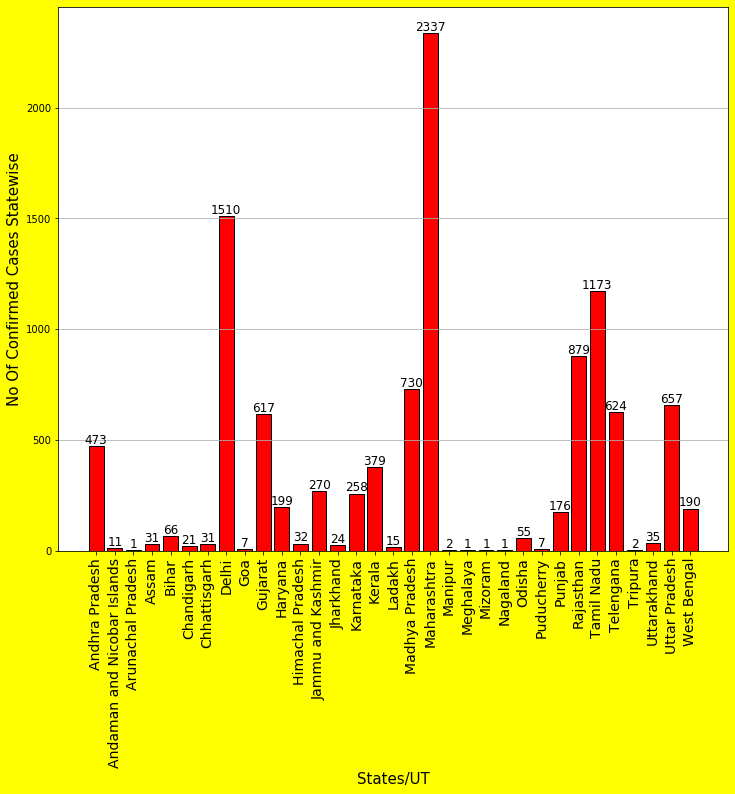

In [7]:
fig=plt.figure(figsize=(12,10))
fig.patch.set_facecolor('yellow')
plt.bar(state_data["States"],state_data["Confirmed"],color='red',edgecolor='black')
plt.xlabel('States/UT',fontsize=15)
plt.grid(axis='y')
plt.xticks(fontsize=14,rotation=90)
import numpy as np
plt.yticks()
plt.ylabel('No Of Confirmed Cases Statewise',fontsize=15)

#values of bar
for index,y in enumerate(state_data["Confirmed"]):
    plt.text(index,y+10,str(y),fontsize=12,horizontalalignment='center')

plt.savefig('Graph_Of_CovidCases.png',pad_inches=0,edgecolor='black', bbox_inches = 'tight')
plt.show()

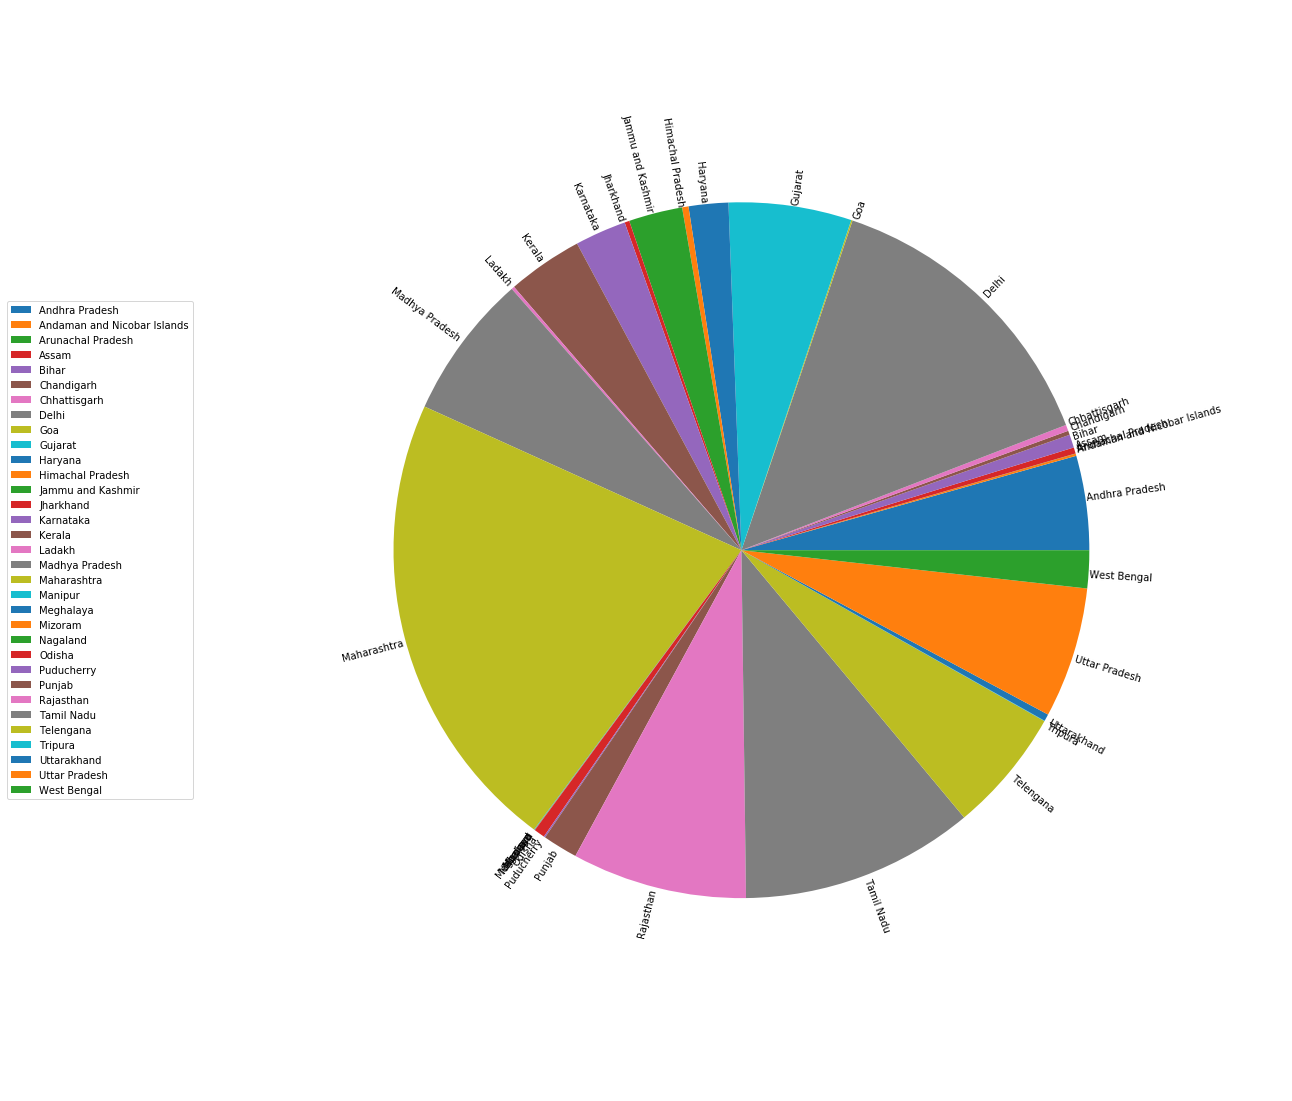

In [8]:
fig=plt.figure(figsize=(20,20))
fig.patch.set_facecolor('White')

plt.pie(state_data['Confirmed'],labels=state_data['States'],rotatelabels=True,radius=0.8,labeldistance=1)
plt.legend(loc='right',bbox_to_anchor=(0,.5))
plt.show()

In [9]:
state_data['Confirmed'].sum()
a=[state_data["Confirmed"].sum(),state_data["Recovered"].sum(),state_data["Death"].sum()]
label=["Confirmed","Recoverd","Death"]
custom_color=['skyblue','yellow','tomato']

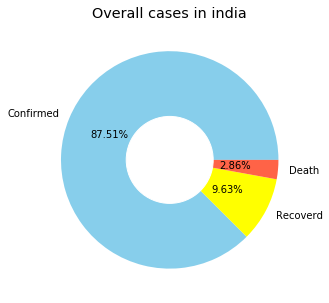

In [10]:
fig=plt.figure(figsize=(5,5))
fig.patch.set_facecolor('White')

plt.pie(a,labels=label,colors=custom_color,autopct='%.2f%%')
central_circle = plt.Circle((0,0), 0.4, color = 'white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=12)
plt.title('Overall cases in india')
plt.show()

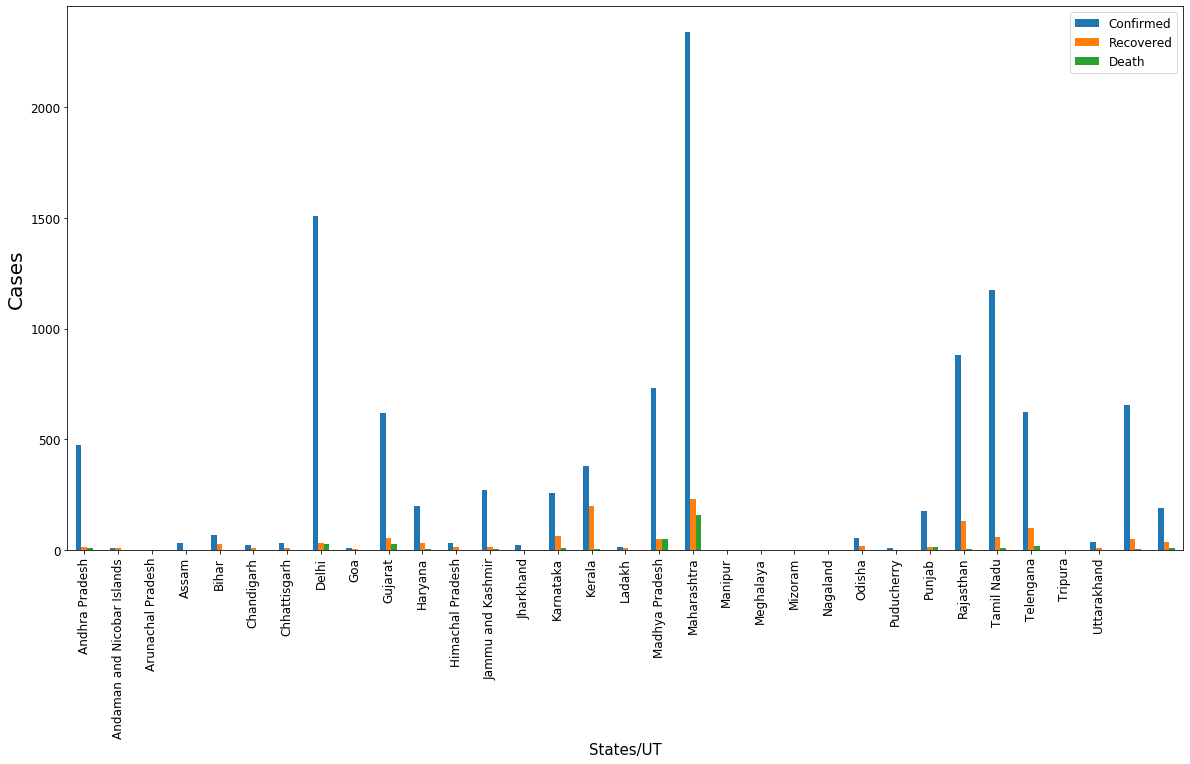

In [11]:
state_data1=state_data.iloc[:,[1,2,3,4]]
plt.rcParams['figure.figsize']=(20,10)
state_data1.plot.bar()
plt.xlabel('States/UT',fontsize=15)
plt.ylabel('Cases',fontsize=20)

plt.xticks(np.arange(0,31,1),labels=state_data1['States'],rotation=90)
plt.show()


In [12]:
state_data.Death.sum()

353

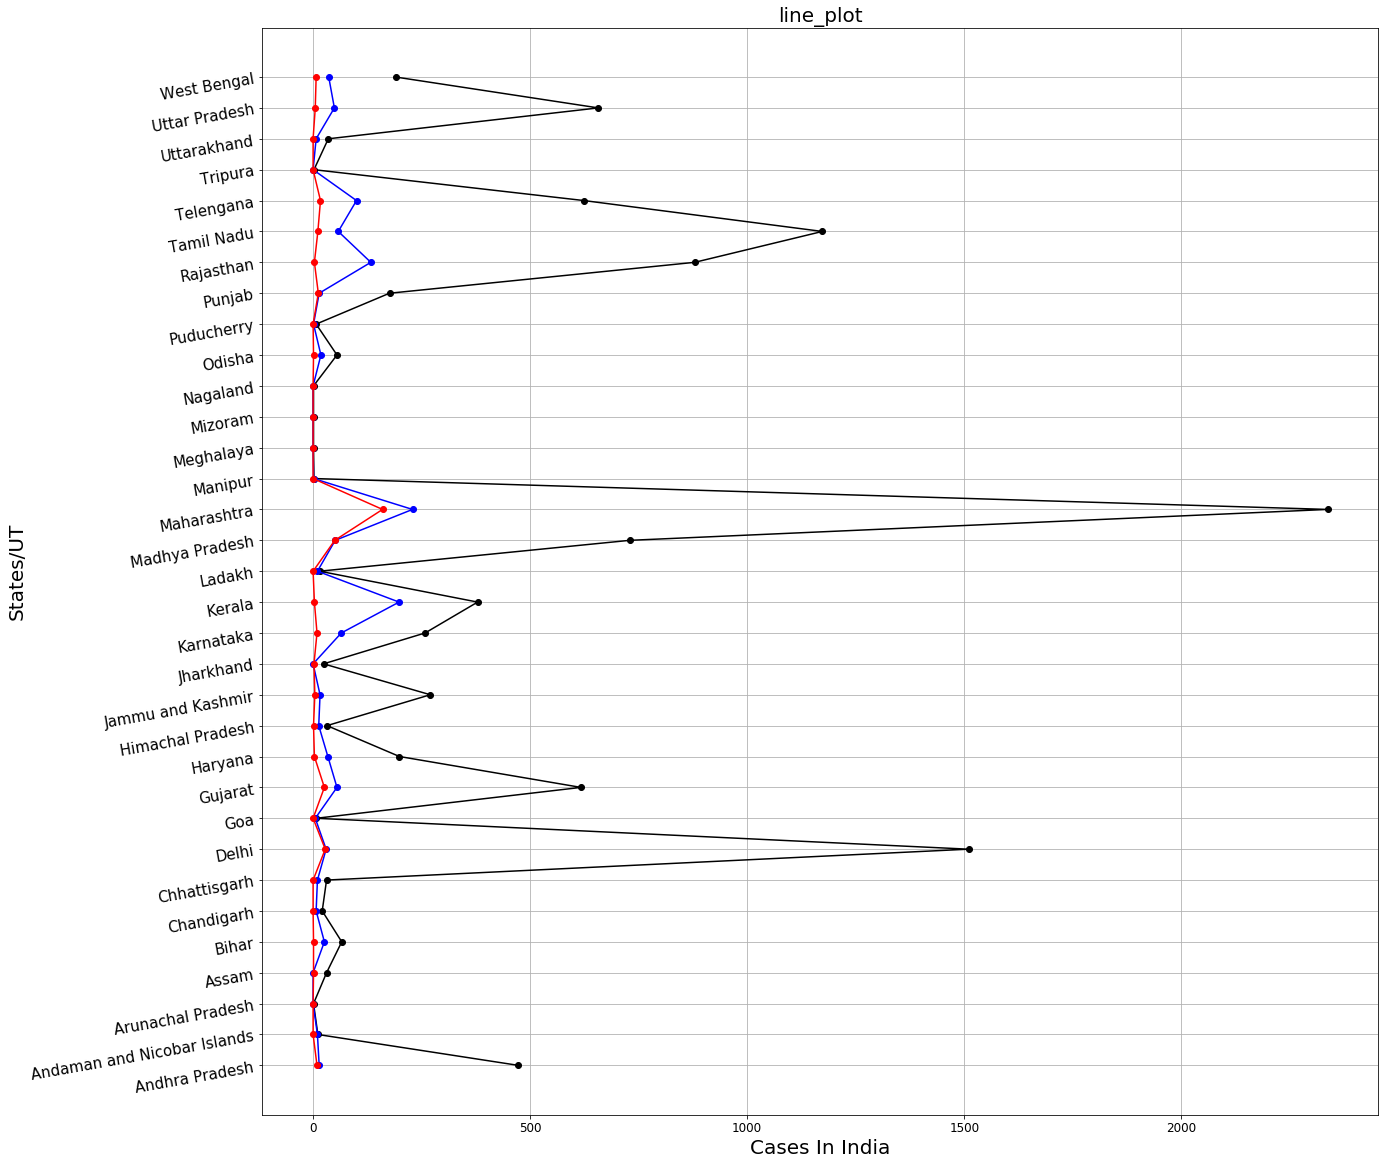

In [35]:
fig=plt.figure(figsize=(20,20))
plt.plot(state_data.Confirmed,state_data.States,marker='o',color='k')
plt.plot(state_data.Recovered,state_data.States,marker='o',color='blue')
plt.plot(state_data.Death,state_data.States,marker='o',color='red')
plt.xlabel("Cases In India",fontsize=20)
plt.ylabel("States/UT",fontsize=20)
plt.yticks(rotation=10,fontsize=15)
plt.grid(axis='both')
plt.title("line_plot",fontsize=20)
plt.show()